In [102]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [103]:
df = pd.read_csv('hou_all.csv')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
              'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV','BIAS_COL']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BIAS_COL
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      505 non-null    float64
 1   ZN        505 non-null    float64
 2   INDUS     505 non-null    float64
 3   CHAS      505 non-null    int64  
 4   NOX       505 non-null    float64
 5   RM        505 non-null    float64
 6   AGE       505 non-null    float64
 7   DIS       505 non-null    float64
 8   RAD       505 non-null    int64  
 9   TAX       505 non-null    int64  
 10  PTRATIO   505 non-null    float64
 11  B         505 non-null    float64
 12  LSTAT     505 non-null    float64
 13  MEDV      505 non-null    float64
 14  BIAS_COL  505 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.3 KB


In [105]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,BIAS_COL
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.0
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901,1.0
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991,0.0
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.0
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000,1.0
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000,1.0
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000,1.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.0


In [106]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


<Axes: >

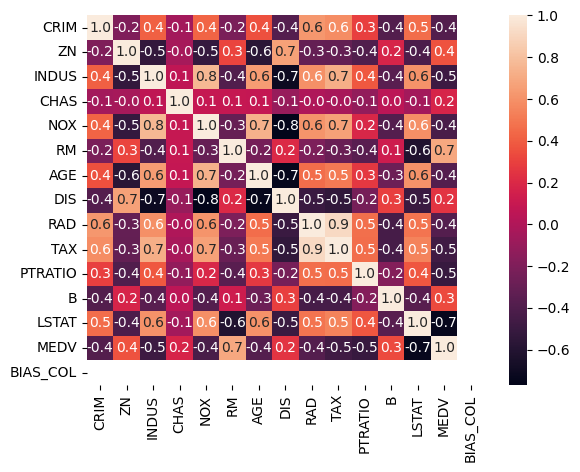

In [107]:
sns.heatmap(df.corr(),annot = True,fmt = '.1f')

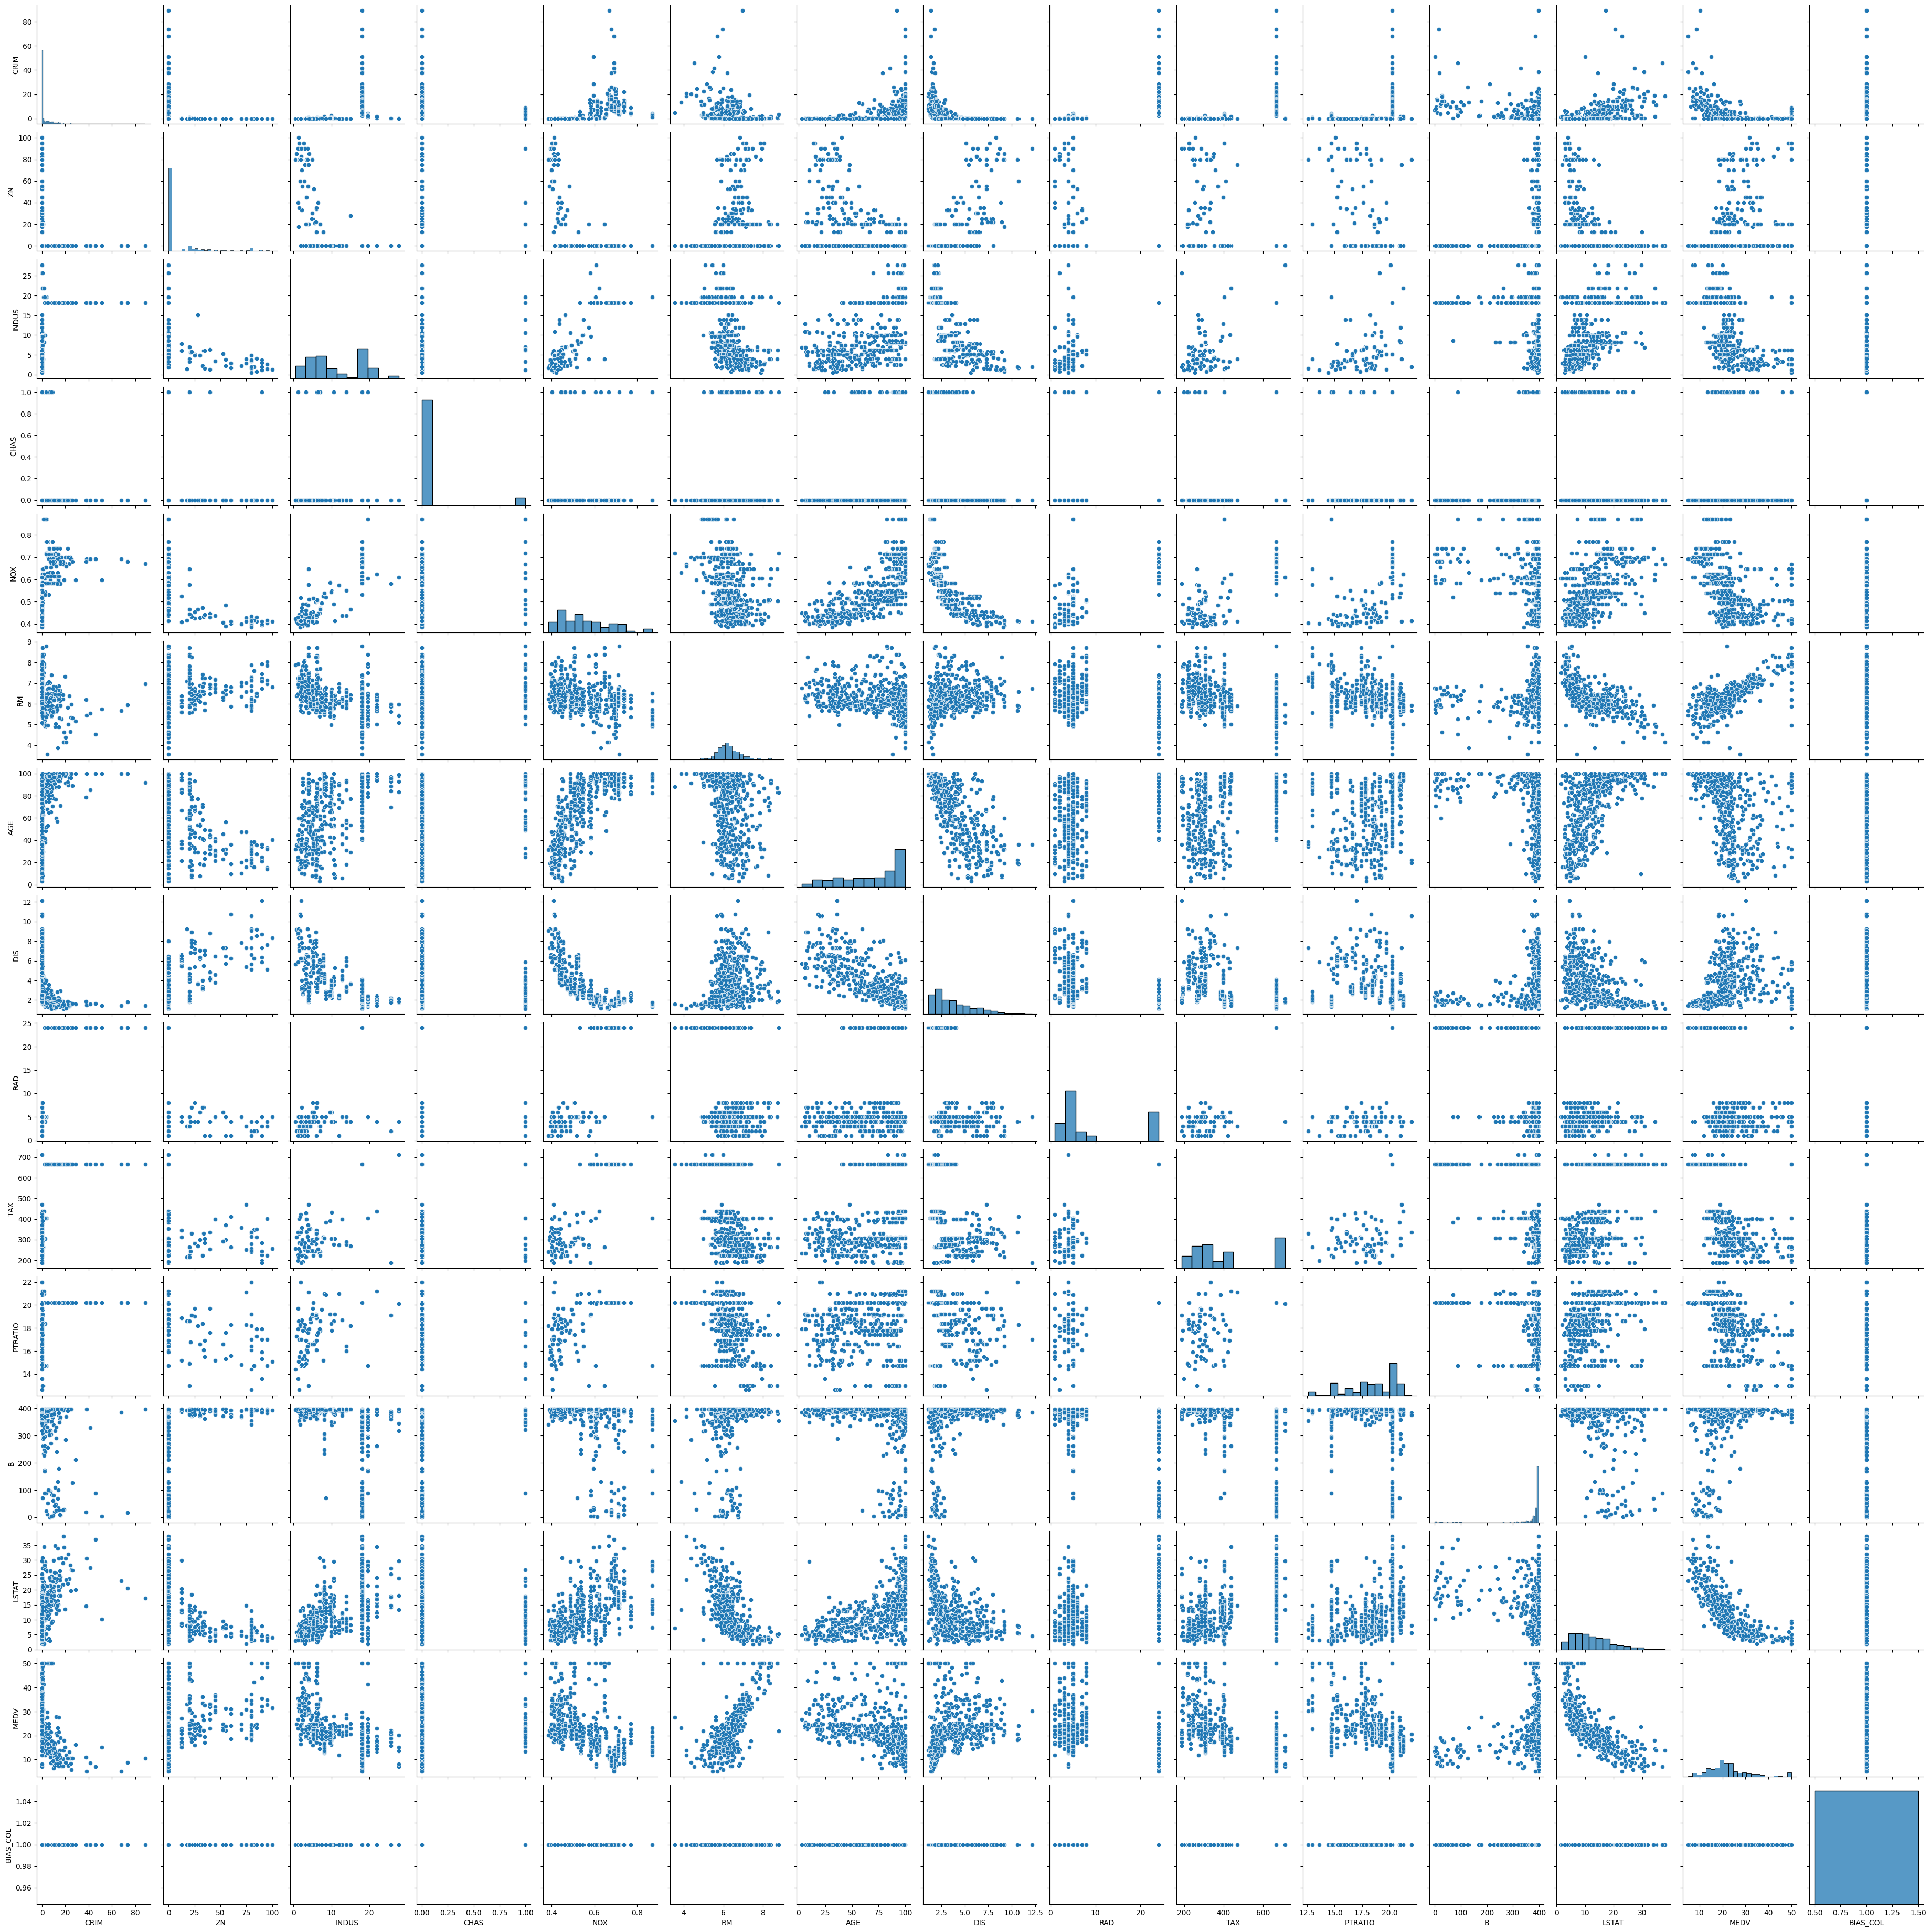

In [108]:
sns.pairplot(df)

Text(0, 0.5, 'Price')

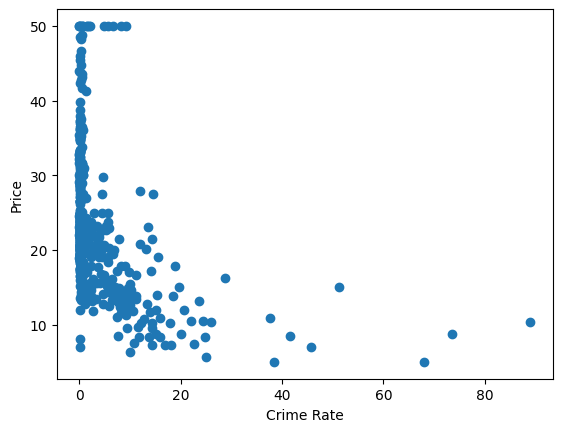

In [109]:
plt.scatter(df['CRIM'], df['MEDV'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

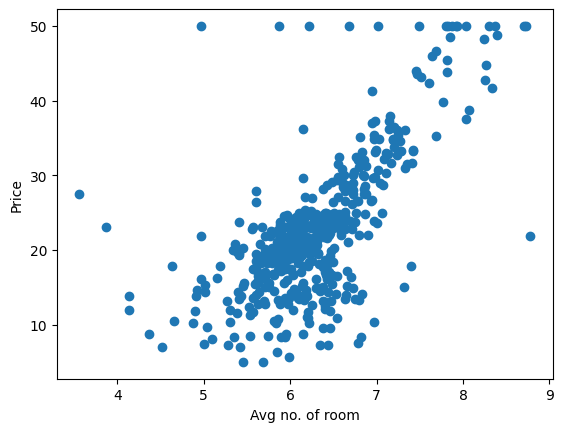

In [110]:
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Avg no. of room')
plt.ylabel('Price')

<Axes: xlabel='RM', ylabel='MEDV'>

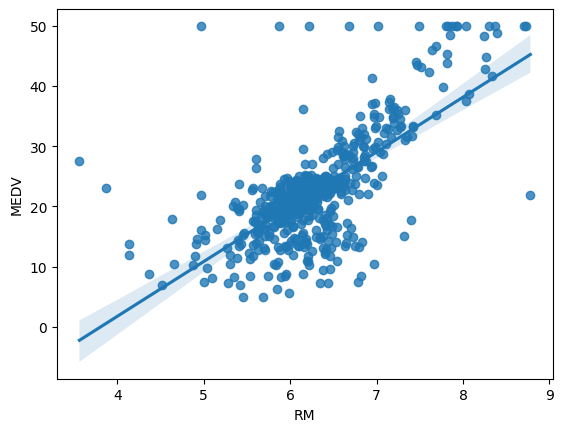

In [111]:
sns.regplot(x = 'RM',y = 'MEDV', data = df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

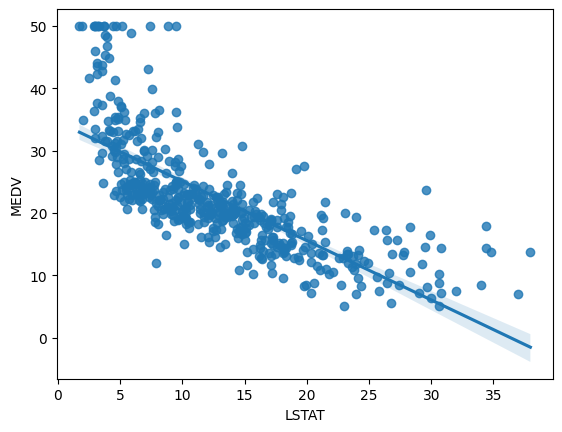

In [112]:
sns.regplot(x = 'LSTAT',y = 'MEDV', data = df)

<Axes: xlabel='CHAS', ylabel='MEDV'>

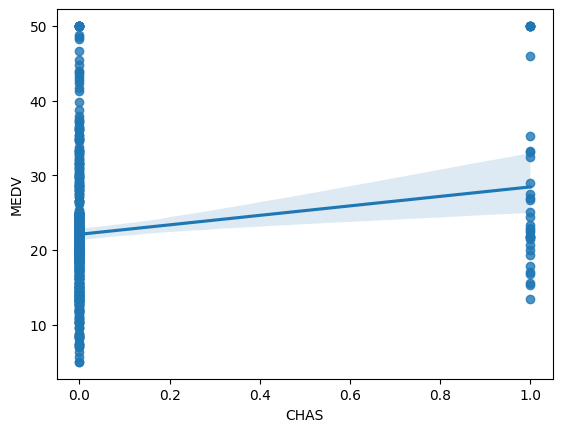

In [113]:
sns.regplot(x = 'CHAS',y = 'MEDV', data = df)

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

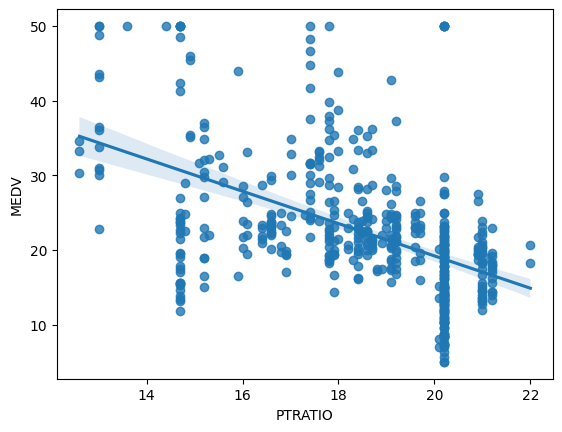

In [114]:
sns.regplot(x = 'PTRATIO',y = 'MEDV', data = df)

In [115]:
X = df.drop('MEDV',axis = 1)
y = df['MEDV']

In [116]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,BIAS_COL
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,1


In [117]:
y.head()

,MEDV
0,21.6
1,34.7
2,33.4
3,36.2
4,28.7


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [119]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,BIAS_COL
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,1
116,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30,1
45,0.18836,0.0,6.91,0,0.448,5.786,33.3,5.1004,3,233,17.9,396.90,14.15,1
16,0.78420,0.0,8.14,0,0.538,5.990,81.7,4.2579,4,307,21.0,386.75,14.67,1
467,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,1


In [120]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,BIAS_COL
173,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,1
274,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98,1
490,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,1
72,0.19539,0.0,10.81,0,0.413,6.245,6.2,5.2873,4,305,19.2,377.17,7.54,1
305,0.07503,33.0,2.18,0,0.472,7.420,71.9,3.0992,7,222,18.4,396.90,6.47,1


In [121]:
y_train.head()

,MEDV
5,22.9
116,19.2
45,20.0
16,17.5
467,19.1


In [122]:
y_test.head()

,MEDV
173,22.6
274,32.0
490,13.6
72,23.4
305,33.4


In [123]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
X_train

array([[-0.41622744,  0.0224121 , -0.49255235, ...,  0.42443416,
        -0.02411446,  0.        ],
       [-0.40878219, -0.51214684, -0.18575241, ...,  0.41222304,
        -0.32047632,  0.        ],
       [-0.40434283, -0.51214684, -0.63018223, ...,  0.43899789,
         0.21520123,  0.        ],
       ...,
       [-0.42327009,  1.19844177, -1.44162505, ...,  0.36001767,
        -0.9340706 ,  0.        ],
       [ 1.28594483, -0.51214684,  0.97406604, ..., -3.69945377,
         0.75783563,  0.        ],
       [-0.40158159, -0.51214684, -0.39363087, ...,  0.41177492,
         0.11641394,  0.        ]])

In [125]:
model = LinearRegression()

In [126]:
model.fit(X_train, y_train)

LinearRegression()

In [127]:
model.score(X_train, y_train)

0.7432514476640653

In [128]:
model.score(X_test, y_test)

0.709256665750732

In [129]:
print(model.coef_)

[-0.92340518  0.83783582  0.21659612  0.66325826 -2.03400232  2.91650506
  0.38915905 -2.91871732  2.58025982 -1.59262328 -2.36392236  1.16155836
 -4.11136395  0.        ]


In [130]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'BIAS_COL'],
      dtype='object')

In [131]:
pred = model.predict(X_test)
pred

array([26.69233685, 33.66729256, 14.98977881, 23.60306119, 35.44214254,
       23.52662362, 11.70133095,  3.32433043, 24.03984452, 20.67677689,
       30.23320037, 19.6149075 , 28.29686276, 22.57039359, 19.50968001,
       26.05314899, 22.30997057,  8.07702429, 36.50781698, 18.41077971,
       28.31619454, 35.24903791, 18.29533297, 23.45209762, 18.73196546,
       11.25083415, 28.23055232, 21.35939411, 16.53459805, 19.21564253,
       29.5685158 , 14.75690256, 26.44650062, 20.15455205, 16.22718653,
       22.97746978, 28.94504553, 19.79546307, 16.69486468, 25.38197036,
       13.74014702, 19.41818531, 22.17212865, 20.76167788, 27.68272308,
       31.14745414, 13.03489031, 21.2946087 , 20.98840927, 25.50654878,
       20.81678186, 40.64802356, 13.73328088, 18.91111096, 25.007344  ,
       22.99811645, 19.71172425, 33.55646368, 27.94297703, 20.00903292,
       23.82297418, 24.68425875, 24.56980092, 18.27199726, 16.3135099 ,
       22.34035303, 21.20230251, 24.83847861, 33.45470735, 11.97

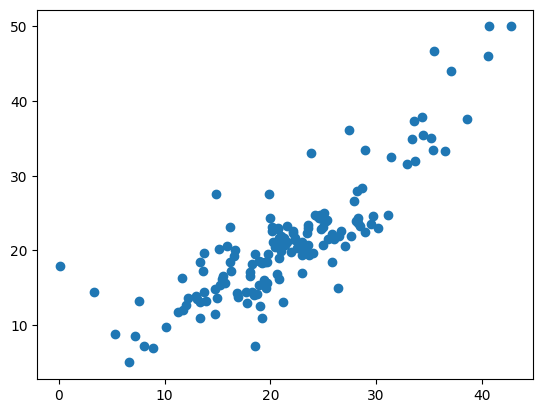

In [132]:
plt.scatter(pred, y_test)

In [133]:
residuals = y_test - pred
residuals

,MEDV
173,-4.092337
274,-1.667293
490,-1.389779
72,-0.203061
305,-2.042143
...,...
440,-0.986389
23,-0.150725
225,-1.036240
432,-2.526648


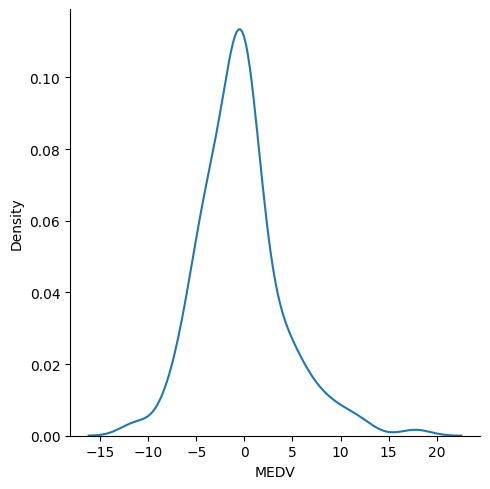

In [134]:
sns.displot(residuals, kind = 'kde')

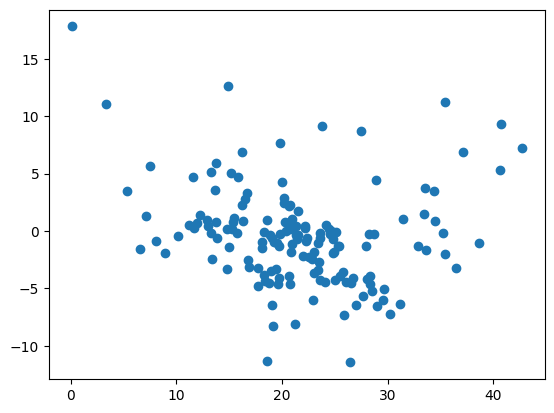

In [135]:
plt.scatter(pred, residuals)

In [136]:
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

3.1269475047856936
18.885453623970353
4.345739709643268


### r2_score and adjusted_r2_scored

r2_score = 1 - (SSR)/(SST)

SSR = sum of squared _residuals
SST = total sum of squared

adjusted = 1 - [(1 - R2)*(n-1)/(n-k-1)]

R2 = R2 of the model
n = number of observations
k = number of predictor_variables

In [137]:
r2  = r2_score(y_test, pred)
r2

0.709256665750732

In [138]:
n = len(y_test)
k = X_test.shape[1]

adj_r2 = 1- ((1-r2) * (n-1)/(n-k-1))
adj_r2

0.6795456680902228

In [139]:
df.iloc[0]

,0
CRIM,0.02731
ZN,0.00000
INDUS,7.07000
CHAS,0.00000
NOX,0.46900
RM,6.42100
AGE,78.90000
DIS,4.96710
RAD,2.00000
TAX,242.00000


In [140]:
val = scaler.transform(X.iloc[0].values.reshape(1,-1))
val

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.42346961, -0.51214684, -0.60724391, -0.28197642, -0.76656978,
         0.13599126,  0.36043862,  0.56245145, -0.88515841, -1.0149713 ,
        -0.20688329,  0.43899789, -0.48187527,  0.        ]])

In [141]:
model.predict(val)

array([25.50654878])

In [142]:
y[0]

21.6

In [143]:
import pickle

In [144]:
pickle.dump(model, open('reg_model.pkl','wb'))
pickle.dump(scaler, open('std_scaler.pkl','wb'))

In [145]:

pickle_model = pickle.load(open('reg_model.pkl','rb'))

In [146]:
pickle_model.predict(val)

array([25.50654878])

### Deployment
